In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
area_fractions = {6: 98.41, 11: 36.38, 16: 6.3, 22: 0.45}
max_cd = {1: 65, 5: 25, 50: 25, 100: 25}
def get_data(img_id, Lz):
    data = pd.read_csv(f"data/frequency-{img_id}-{Lz}.csv")
    arr1 = data[['vleft [A/m2]', 'freql']].to_numpy()
    arr2 = data[['vleft [A/m2]', 'freqr']].to_numpy()

    return arr1, arr2

In [14]:
norm_current = {
    1: 60,
    5: 15,
    50: 5,
    100: 2.5,
}
def make_bar_plot(img, Lz, type="right"):
    try:
        arr1, arr2 = get_data(img_id, Lz)
    except Exception:
        return
    i_norm = norm_current[Lz]
    # arr1[:, 0] = arr1[:, 0] / i_norm
    # arr2[:, 0] = arr2[:, 0] / i_norm
    fig, ax = plt.subplots()
    if type == "left":
        arr = arr1
    else:
        arr = arr2
    ax.bar(arr1[:, 0], arr1[:, 1]);
    ax.set_title(f"Frequency plot at {type} " + r"$\tilde{i}$" + f" = {i_norm} A/m" + r"$^2$ " + r"$L_z$" + f" = {Lz*800/470:.1f}" + ", " + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    ax.set_xlabel(r"$\frac{i}{\tilde{i}}$", fontsize='x-large')
    ax.set_ylabel('frequency')
    ax.grid(True, which='both')
    ax.minorticks_on()
    plt.tight_layout()
    # ax.legend()
    plt.savefig(f'figures/frequency-bar-{type}-{img_id}-{Lz}.png', dpi=1500)
    
def make_plot(img_id, Lz):
    try:
        arr1, arr2 = get_data(img_id, Lz)
    except Exception:
        return
    i_norm = norm_current[Lz]
    arr1[:, 0] = arr1[:, 0] / i_norm
    arr2[:, 0] = arr2[:, 0] / i_norm
    fig, ax = plt.subplots()
    ax.plot(arr1[:, 0], arr1[:, 1], 'b-', linewidth=0.75, label='left');
    # ax.set_xlim([0, 1]);
    # ax[0].set_xlim([0, max_cd[Lz]]);
    ax.set_ylabel('frequency')
    ax.set_xlabel(f'i/{i_norm}Am' +r'$^{-2}$')
    ax.set_title(r'$L_z$' + f' = {800*Lz/470:.1f} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    ax.plot(arr2[:, 0], arr2[:, 1], 'r-', linewidth=0.75, label='right');
    ax.set_xlim([-0.01, 1]);
    # if Lz == 5:
    #     ax[1].set_xlim([-1, 15]);
    # elif Lz == 50:
    #     ax[1].set_xlim([-0.1, 2]);
    # elif Lz == 100:
    #     ax[1].set_xlim([-0.1, 1]);
    # else:
    #     ax[1].set_xlim([-1, max_cd[Lz]]);
    # ax[1].set_ylabel('frequency')
    # ax[1].set_xlabel(r'$i\ [Am^{-2}]$')
    # ax[1].set_xlabel(f'i/{i_norm}Am' +r'$^{-2}$')
    # ax[1].set_title('Right: ' + r'$L_z$' + f' = {800*Lz/470:.1f} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    plt.tight_layout()
    ax.legend()
    plt.savefig(f'figures/frequency-{img_id}-{Lz}.png', dpi=1500)

def make_plot_left(img_id, Lz):
    try:
        arr1, arr2 = get_data(img_id, Lz)
    except Exception:
        return
    i_norm = norm_current[Lz]
    arr1[:, 0] = arr1[:, 0] / i_norm
    fig, ax = plt.subplots()
    ax.plot(arr1[:, 0], arr1[:, 1], 'b-', linewidth=2.5, label='left');
    ax.set_ylabel('frequency')
    ax.set_xlabel(f'i/{i_norm}Am' +r'$^{-2}$')
    ax.set_title(r'$L_z$' + f' = {800*Lz/470:.1f} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    ax.set_xlim([0, 1]);
    ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    ax.legend()
    plt.savefig(f'figures/frequency-left-{img_id}-{Lz}.png', dpi=1500)

def make_plot_right(img_id, Lz):
    try:
        arr1, arr2 = get_data(img_id, Lz)
    except Exception:
        return
    i_norm = norm_current[Lz]
    arr2[:, 0] = arr2[:, 0] / i_norm
    fig, ax = plt.subplots()
    ax.plot(arr2[:, 0], arr2[:, 1], 'r-', linewidth=2.5, label='right');
    ax.set_ylabel('frequency')
    ax.set_xlabel(f'i/{i_norm}Am' +r'$^{-2}$')
    ax.set_title(r'$L_z$' + f' = {800*Lz/470:.1f} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}%')
    ax.set_xlim([0, 1]);
    ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    ax.legend()
    plt.savefig(f'figures/frequency-right-{img_id}-{Lz}.png', dpi=1500)

### Frequency Distribution of Current Density for Thickness and Active Area Fraction

In [15]:
# for Lz in [1, 5, 50, 100]:
#     for img_id in [6, 11, 16, 22]:
#         try:
#             make_plot(img_id, Lz)
#         except Exception as e:
#             print(f"No data for Lz = {Lz} and image id = {img_id}")
#             continue

In [16]:
# for Lz in [1, 5, 50, 100]:
#     for img_id in [6, 11, 16, 22]:
#         for type in ["right"]:
#             make_bar_plot(img_id, Lz, type=type)

In [6]:
df = pd.read_csv('data/current-density-zero-right.csv')
df.head(), df.columns

FileNotFoundError: [Errno 2] No such file or directory: 'data/current-density-zero-right.csv'

In [ ]:
fig, ax = plt.subplots()
colors = {'r': 1.7, 'b': 85, 'g': 170}
data_arr = np.array(df.to_numpy(), dtype=float)
for c, v in colors.items():
    data = data_arr[np.isclose(data_arr[:, 0], v), :]
    ax.plot(data[:, 1], data[:, 2]/100, color=c, label=f'Lz = {v} ' + r'$\mu m$')
ax.set_xlabel(r'LMA/SSE $\frac{A}{A_0}$ %', fontsize='xx-large')
ax.set_ylabel(r'$\frac{A(i \approx 0)}{A_0}$ %', fontsize='xx-large')
ax.legend()
plt.tight_layout()
plt.savefig(f'figures/current-density-zero-right.png', dpi=1500)

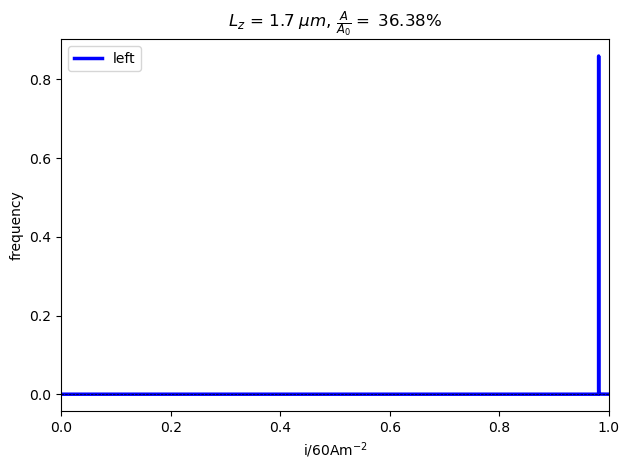

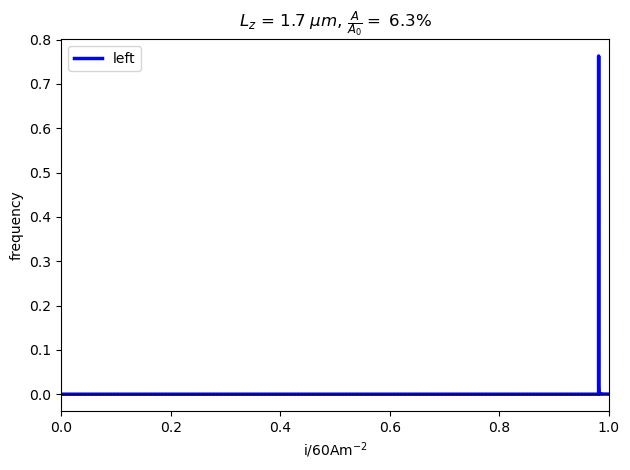

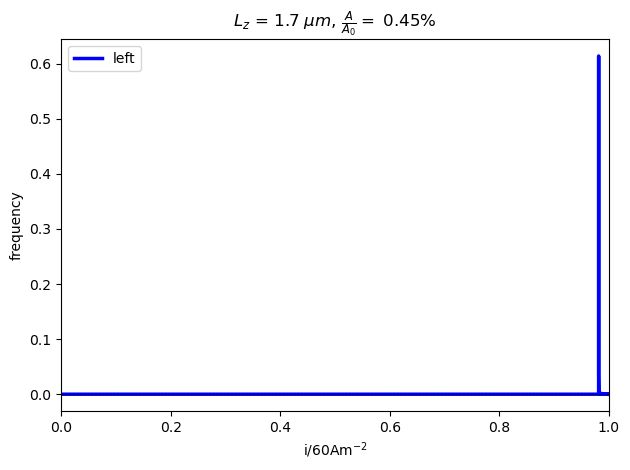

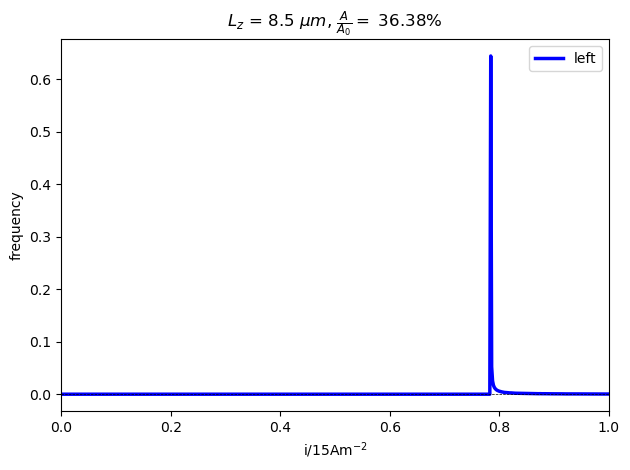

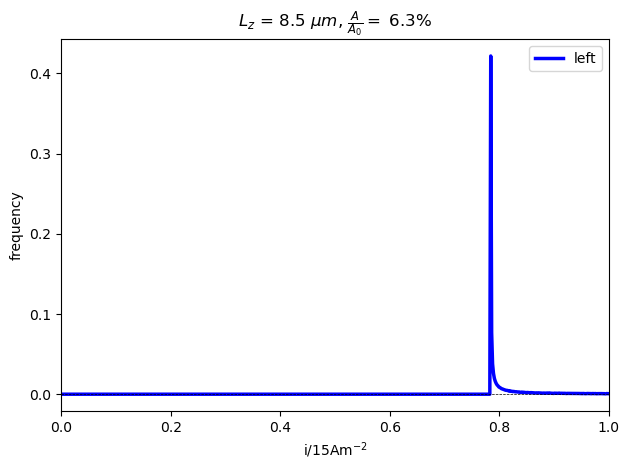

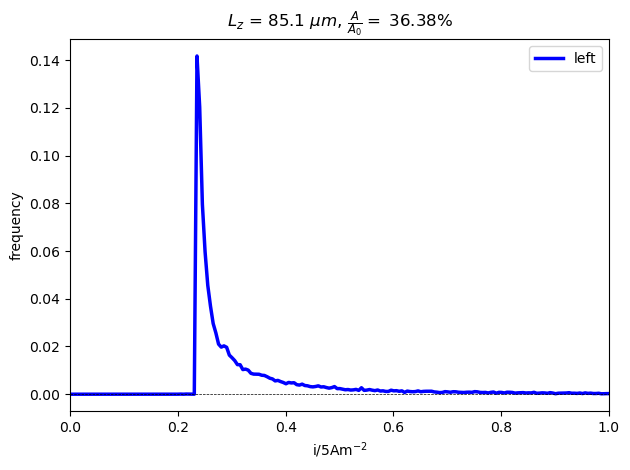

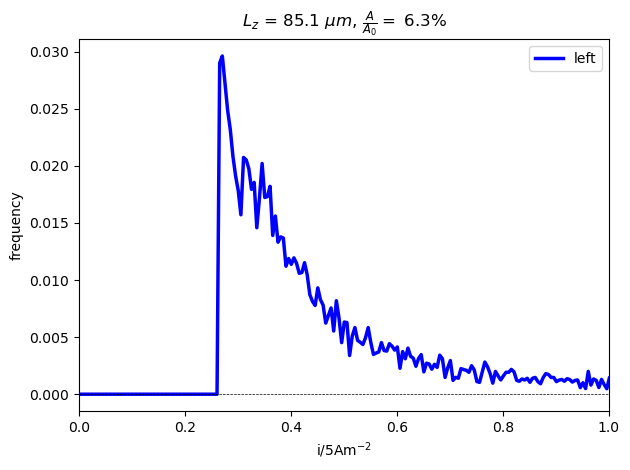

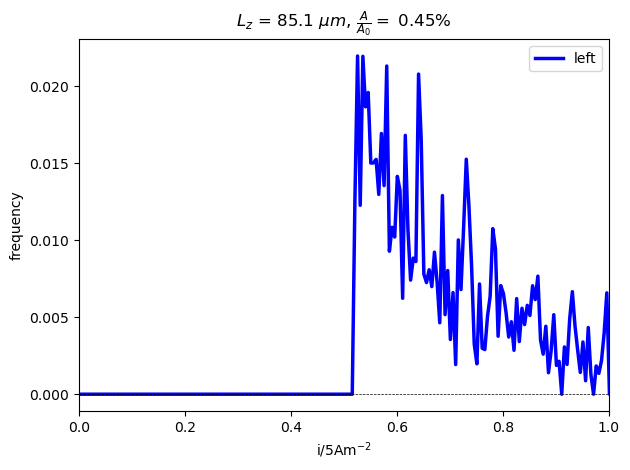

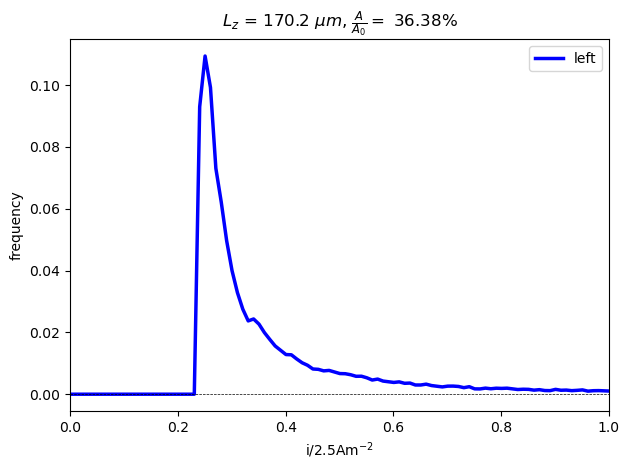

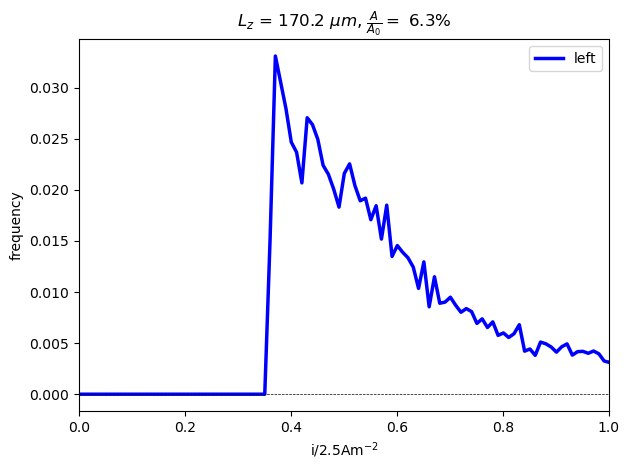

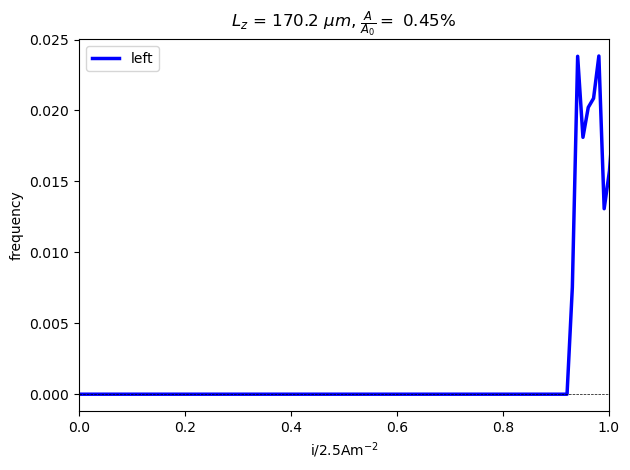

In [17]:
for Lz in [1, 5, 50, 100]:
    for img_id in [11, 16, 22]:
        try:
            make_plot_left(img_id, Lz)
        except Exception as e:
            print(f"No data for Lz = {Lz} and image id = {img_id}")
            continue

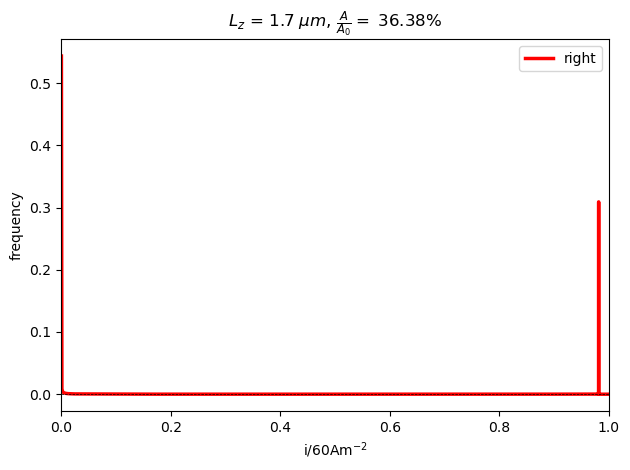

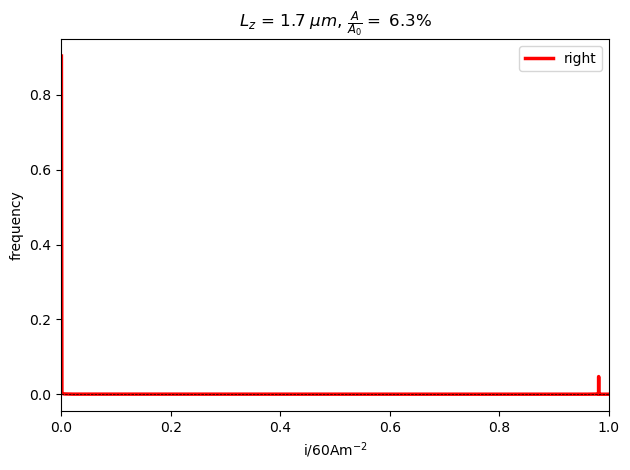

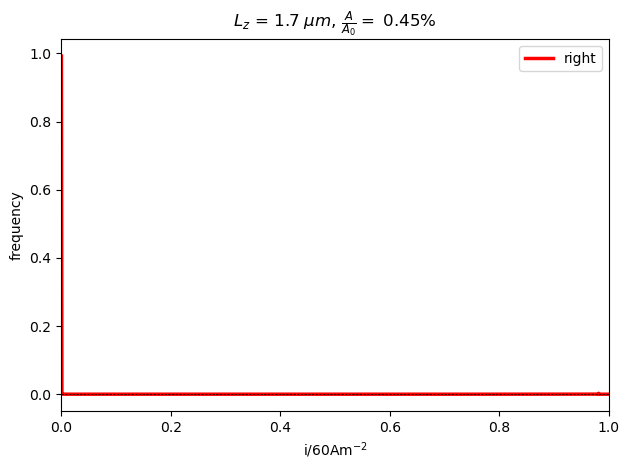

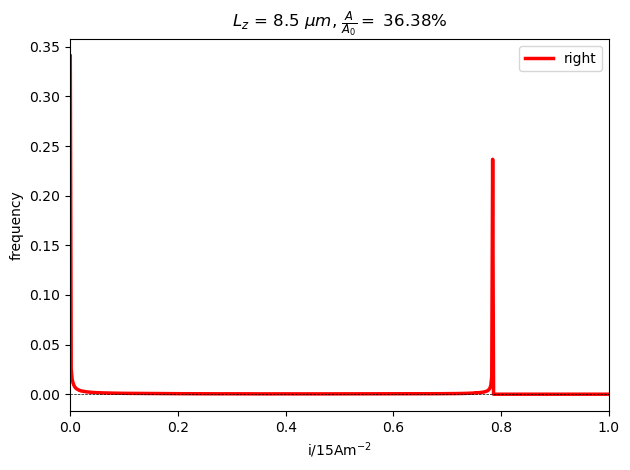

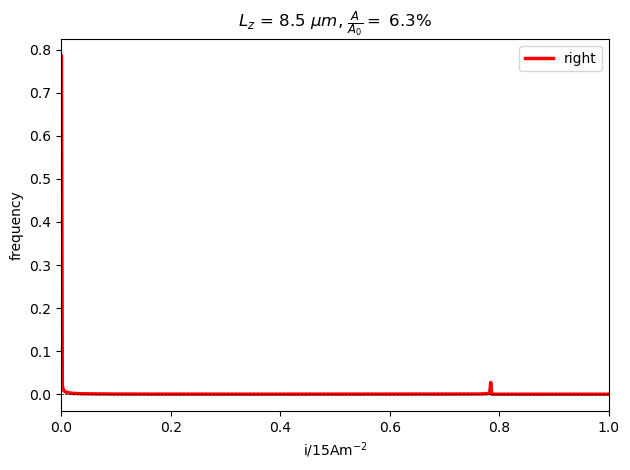

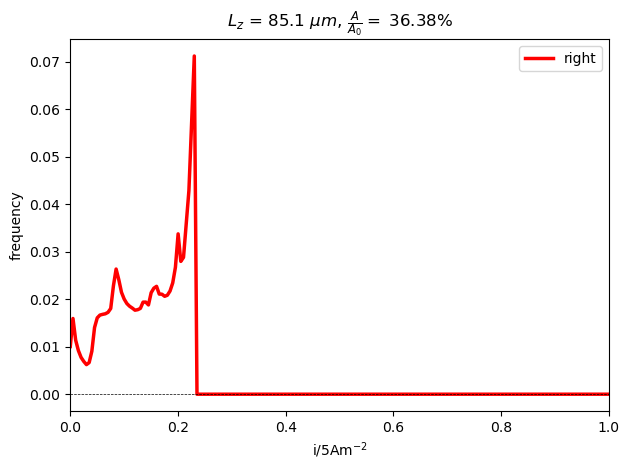

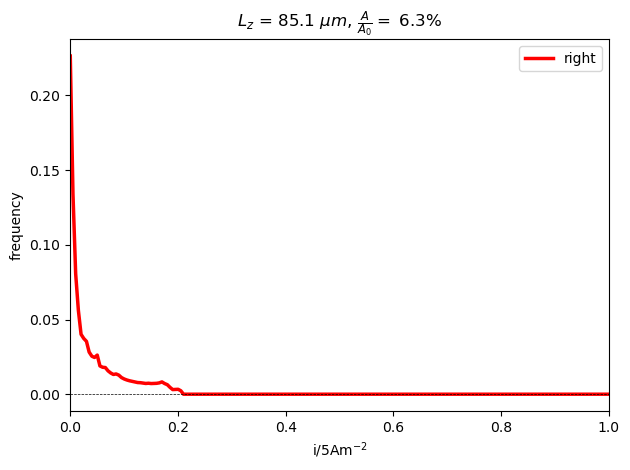

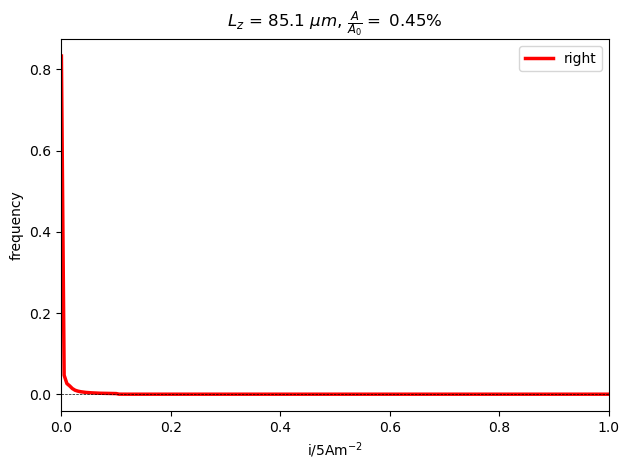

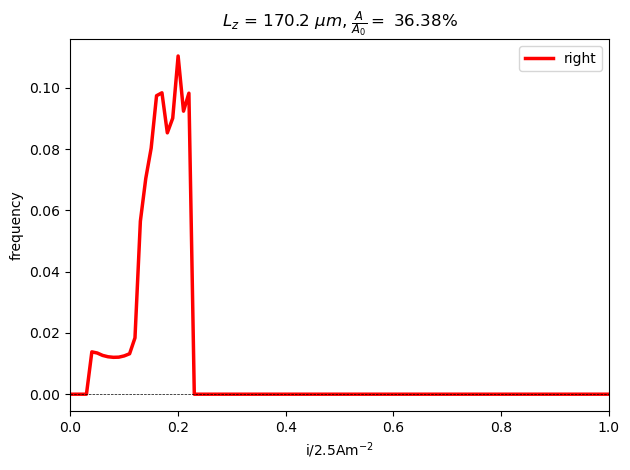

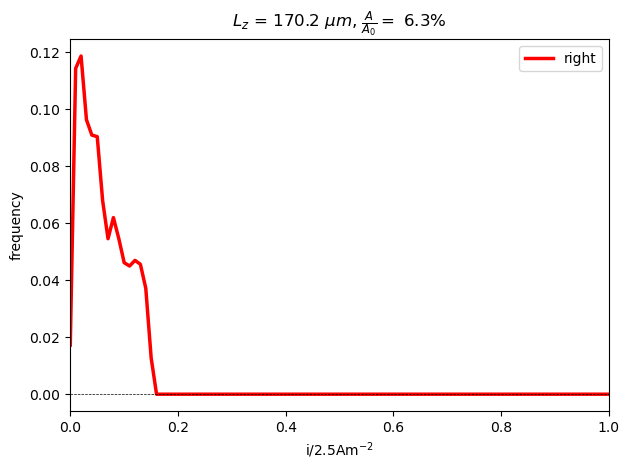

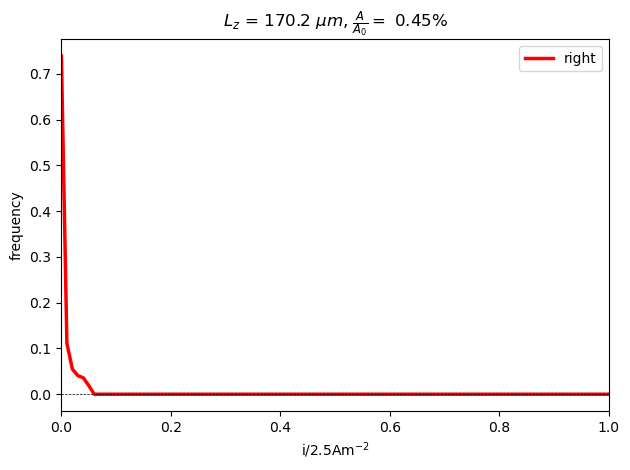

In [13]:
for Lz in [1, 5, 50, 100]:
    for img_id in [11, 16, 22]:
        try:
            make_plot_right(img_id, Lz)
        except Exception as e:
            print(f"No data for Lz = {Lz} and image id = {img_id}")
            continue